# Optimalno upravljanje - Zadatak 6 - nalazenje optimalne strategije upravljanja, bez ogranicenja na upravljanje

## Biblioteke

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Pocetni uslovi, promenjive

In [28]:
T_sample = 0.001
t_start = 0
t_stop = 1
t = np.arange(t_start, t_stop, T_sample)
N = len(t)

Pocetni uslovi:

In [29]:
x1_0 = 1
x2_0 = 1

x = np.zeros((N,2))
x[0,0] = x1_0
x[0,1] = x2_0

p = np.zeros ((N,2))
u = np.ones((N,1)) # inicijalno pretpostavljeno upravljanje

Izvodi promenjivih stanja i generalisanih impulsa:

In [30]:
def x1_dot(x, u):
    return x[1]

def x2_dot(x, u):
    return x[0] + u

def p1_dot(x, p, u):
    return -p[1]

def p2_dot(x, p, u):
    return -p[0]

## Simulacija

In [31]:
eps = 0.00001
iter = 0
w = 0.9

while iter < 1000:
    iter = iter + 1
    if iter % 5 == 0:
        print(f'Iteration number: {iter}')
    u_old = u.copy()
    
    # Ojler 1 za diskretizovanje promenjivih stanja:
    for k in range(N-1):
        x[k+1, 0] = x[k, 0] + T_sample * (x1_dot(x[k], u[k]))
        x[k+1, 1] = x[k, 1] + T_sample  * (x2_dot(x[k], u[k]))
        
    # Ojler 2 za intergraciju unazad generalisanih impulsa
    for k in range(N-1):
        p[N - 2 - k, 0] = p[N - 1 - k, 0] - T_sample * p1_dot(x[N - 1 - k], p[N - 1 - k], u[N - 1 - k])
        p[N - 2 - k, 1] = p[N - 1 - k, 1] - T_sample * p2_dot(x[N - 1 - k], p[N - 1 - k], u[N - 1 - k])
    
    # NF filtar sa w decay radi brze konvergencije
    for k in range(N):
        u_new = -p[k, 1] / 2
        u[k] = pow(w, iter) * u[k] + (1 - pow(w, iter)) * u_new
    
    # Uslov konvergencije
    if sum(np.abs(u - u_old)) <= eps * sum(np.abs(u)):
        break

Iteration number: 5
Iteration number: 10
Iteration number: 15
Iteration number: 20
Iteration number: 25
Iteration number: 30
Iteration number: 35
Iteration number: 40
Iteration number: 45
Iteration number: 50
Iteration number: 55
Iteration number: 60
Iteration number: 65
Iteration number: 70
Iteration number: 75
Iteration number: 80
Iteration number: 85
Iteration number: 90
Iteration number: 95
Iteration number: 100
Iteration number: 105
Iteration number: 110
Iteration number: 115
Iteration number: 120


## Promenjive stanja

Text(0.5, 0, 't')

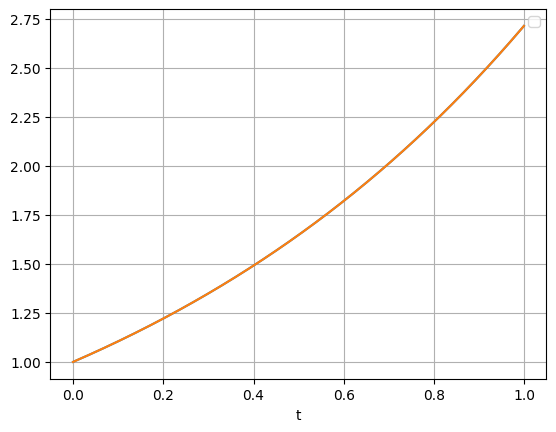

In [32]:
plt.plot(t, x)
plt.grid()
plt.legend('x_1','x_2')
plt.xlabel('t')

## Upravljanje

Text(0.5, 0, 't')

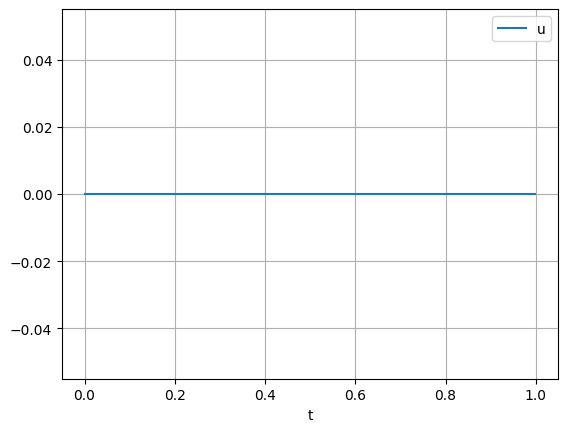

In [33]:
plt.plot(t, u)
plt.grid()
plt.legend('u')
plt.xlabel('t')

## Generalisani impulsi

Text(0.5, 0, 't')

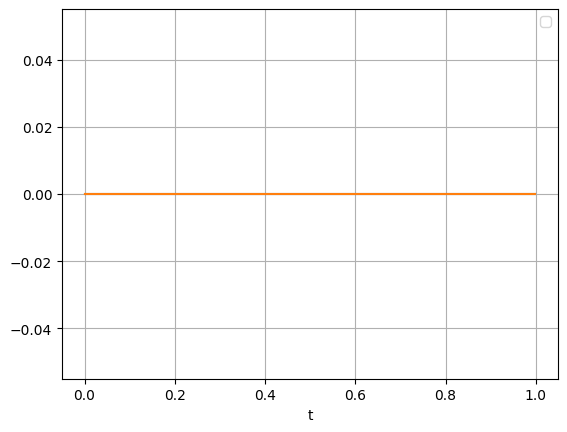

In [34]:
plt.plot(t, p)
plt.grid()
plt.legend('p_1', 'p_2')
plt.xlabel('t')